In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import json
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

class CreditCardFraudPredictor:
    def __init__(self, model_dir):
        self.model_dir = model_dir
        self.models = {}
        self.predictions = {}
        
    def load_models(self, timestamp):
        """Load all trained models"""
        # Load LightGBM
        lgb_path = os.path.join(self.model_dir, f'lightgbm_model_{timestamp}.txt')
        self.models['lgb'] = lgb.Booster(model_file=lgb_path)
        
        # Load Random Forest
        with open(os.path.join(self.model_dir, f'random_forest_model_{timestamp}.pkl'), 'rb') as f:
            self.models['rf'] = pickle.load(f)
            
        # Load XGBoost
        with open(os.path.join(self.model_dir, f'xgb_random_search_model_{timestamp}.pkl'), 'rb') as f:
            self.models['xgb'] = pickle.load(f)
    
    def predict(self, X):
        """Make predictions with all models"""
        self.predictions['lgb'] = self.models['lgb'].predict(X)
        self.predictions['rf'] = self.models['rf'].predict_proba(X)[:, 1]
        self.predictions['xgb'] = self.models['xgb'].predict_proba(X)[:, 1]
        
        # Ensemble prediction (weighted average)
        weights = {'lgb': 0.4, 'rf': 0.3, 'xgb': 0.3}
        ensemble_pred = sum(self.predictions[model] * weight 
                          for model, weight in weights.items())
        
        return ensemble_pred
    
    def evaluate(self, X, y):
        """Evaluate model performance"""
        predictions = self.predict(X)
        binary_predictions = (predictions > 0.5).astype(int)
        
        # Calculate metrics
        print("\nClassification Report:")
        print(classification_report(y, binary_predictions))
        
        print("\nROC AUC Score:")
        print(roc_auc_score(y, predictions))
        
        return predictions
    
    def save_predictions(self, predictions, output_path):
        """Save predictions to CSV"""
        pd.DataFrame({
            'predicted_probability': predictions,
            'predicted_class': (predictions > 0.5).astype(int)
        }).to_csv(output_path, index=False)

In [3]:
def main():
    # Set paths
    current_dir = os.getcwd()
    model_dir = os.path.join(current_dir, "models")
    data_dir = os.path.join(current_dir, "training_data")
    
    # Load test data
    X_test = pd.read_csv(os.path.join(data_dir, "X_test_clean.csv"))
    y_test = pd.read_csv(os.path.join(data_dir, "y_test_clean.csv"))
    
    # Initialize predictor
    predictor = CreditCardFraudPredictor(model_dir)
    
    # Load models (replace with your timestamp)
    timestamp = "20241023_005420"
    predictor.load_models(timestamp)
    
    # Make predictions and evaluate
    predictions = predictor.evaluate(X_test, y_test)
    
    # Save predictions
    output_path = os.path.join(current_dir, f'predictions_{timestamp}.csv')
    predictor.save_predictions(predictions, output_path)
    
    print(f"\nPredictions saved to: {output_path}")

if __name__ == "__main__":
    main()


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       725
           1       0.78      0.73      0.75        63

    accuracy                           0.96       788
   macro avg       0.88      0.86      0.87       788
weighted avg       0.96      0.96      0.96       788


ROC AUC Score:
0.9622988505747126

Predictions saved to: c:\Users\JUN-MING-WU\Desktop\ntu_homework\2_1\MLDL\ML\HW\mid\predictions_20241023_005420.csv


Optimizing thresholds...


c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassi

lgb - Best Threshold: 0.39, Best F1: 0.7656
rf - Best Threshold: 0.34, Best F1: 0.7737
xgb - Best Threshold: 0.73, Best F1: 0.7350


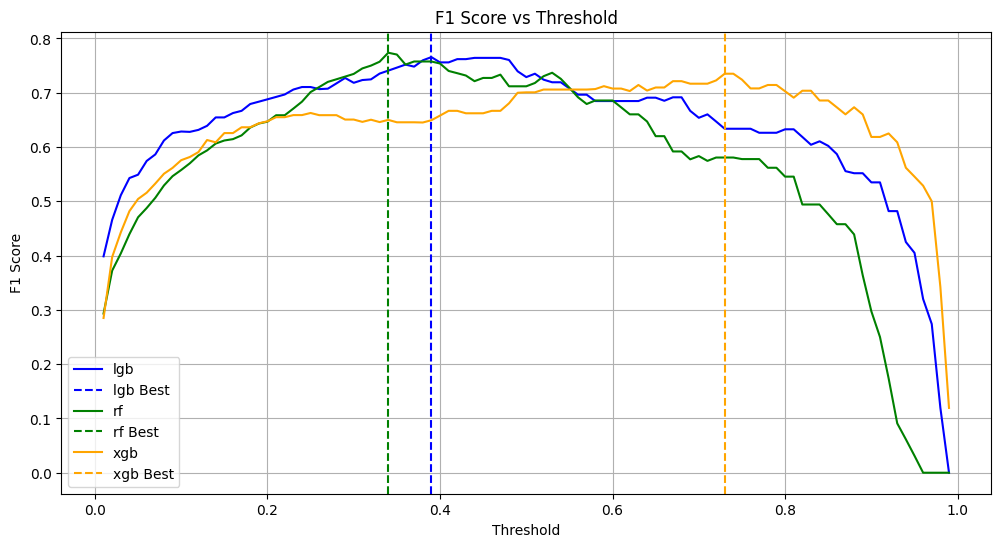


Best common threshold: 0.40

Metrics with common threshold:
lgb - Precision: 0.7500, Recall: 0.7619, F1: 0.7559
rf - Precision: 0.7313, Recall: 0.7778, F1: 0.7538
xgb - Precision: 0.5618, Recall: 0.7937, F1: 0.6579

Making final predictions...


c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassi


Predictions saved to: c:\Users\JUN-MING-WU\Desktop\ntu_homework\2_1\MLDL\ML\HW\mid\predictions_20241023_005420.csv


c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\JUN-MING-WU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassi

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle
import json
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

class CreditCardFraudPredictor:
    def __init__(self, model_dir):
        self.model_dir = model_dir
        self.models = {}
        self.predictions = {}
        self.best_thresholds = {}
        self.common_threshold = None
        
    def load_models(self, timestamp):
        """Load all trained models"""
        # Load LightGBM
        lgb_path = os.path.join(self.model_dir, f'lightgbm_model_{timestamp}.txt')
        self.models['lgb'] = lgb.Booster(model_file=lgb_path)
        
        # Load Random Forest
        with open(os.path.join(self.model_dir, f'random_forest_model_{timestamp}.pkl'), 'rb') as f:
            self.models['rf'] = pickle.load(f)
            
        # Load XGBoost
        with open(os.path.join(self.model_dir, f'xgb_random_search_model_{timestamp}.pkl'), 'rb') as f:
            self.models['xgb'] = pickle.load(f)
    
    def predict_probabilities(self, X):
        """Get probability predictions from all models"""
        self.predictions['lgb'] = self.models['lgb'].predict(X)
        self.predictions['rf'] = np.mean([estimator.predict_proba(X)[:, 1] 
                                        for estimator in self.models['rf'].estimators_], axis=0)
        self.predictions['xgb'] = self.models['xgb'].predict_proba(X)[:, 1]
        return self.predictions
    
    def find_best_threshold(self, y_true, y_prob, thresholds):
        """Find optimal threshold for binary classification"""
        best_f1 = 0
        best_threshold = 0
        for threshold in thresholds:
            y_pred = (y_prob >= threshold).astype(int)
            f1 = f1_score(y_true, y_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
        return best_threshold, best_f1
    
    def optimize_thresholds(self, X, y, threshold_range=np.arange(0.01, 1, 0.01)):
        """Find optimal thresholds for all models"""
        predictions = self.predict_probabilities(X)
        
        # Find best threshold for each model
        for model_name, y_prob in predictions.items():
            best_threshold, best_f1 = self.find_best_threshold(y, y_prob, threshold_range)
            self.best_thresholds[model_name] = {
                'threshold': best_threshold,
                'f1_score': best_f1
            }
            print(f"{model_name} - Best Threshold: {best_threshold:.2f}, Best F1: {best_f1:.4f}")
        
        # Plot F1 scores vs thresholds
        self.plot_threshold_optimization(y, threshold_range)
        
        # Find common threshold
        common_range = np.arange(0.3, 0.7, 0.01)
        f1_scores_common = []
        
        for threshold in common_range:
            f1_scores = []
            for y_prob in predictions.values():
                y_pred = (y_prob >= threshold).astype(int)
                f1_scores.append(f1_score(y, y_pred))
            f1_scores_common.append(np.mean(f1_scores))
        
        self.common_threshold = common_range[np.argmax(f1_scores_common)]
        print(f"\nBest common threshold: {self.common_threshold:.2f}")
        
        # Print results with common threshold
        self.print_metrics_with_threshold(y, self.common_threshold)
    
    def plot_threshold_optimization(self, y, thresholds):
        """Plot F1 scores vs thresholds for all models"""
        plt.figure(figsize=(12, 6))
        colors = {'lgb': 'blue', 'xgb': 'orange', 'rf': 'green'}
        
        for model_name, y_prob in self.predictions.items():
            f1_scores = [f1_score(y, (y_prob >= t).astype(int)) for t in thresholds]
            plt.plot(thresholds, f1_scores, label=model_name, color=colors[model_name])
            
            # Add vertical lines for best thresholds
            best_threshold = self.best_thresholds[model_name]['threshold']
            plt.axvline(x=best_threshold, color=colors[model_name], 
                       linestyle='--', label=f'{model_name} Best')
        
        plt.title('F1 Score vs Threshold')
        plt.xlabel('Threshold')
        plt.ylabel('F1 Score')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def print_metrics_with_threshold(self, y, threshold):
        """Print precision, recall, and F1 score using specified threshold"""
        print("\nMetrics with common threshold:")
        for model_name, y_prob in self.predictions.items():
            y_pred = (y_prob >= threshold).astype(int)
            precision = precision_score(y, y_pred)
            recall = recall_score(y, y_pred)
            f1 = f1_score(y, y_pred)
            print(f"{model_name} - Precision: {precision:.4f}, "
                  f"Recall: {recall:.4f}, F1: {f1:.4f}")
    
    def predict(self, X, use_common_threshold=True):
        """Make final predictions using ensemble of models"""
        predictions = self.predict_probabilities(X)
        
        # Use weighted average for ensemble
        weights = {'lgb': 0.4, 'rf': 0.3, 'xgb': 0.3}
        ensemble_pred = sum(predictions[model] * weight 
                          for model, weight in weights.items())
        
        threshold = self.common_threshold if use_common_threshold else 0.5
        return (ensemble_pred >= threshold).astype(int), ensemble_pred
    
    def save_predictions(self, predictions, probabilities, output_path):
        """Save predictions to CSV"""
        pd.DataFrame({
            'predicted_class': predictions,
            'predicted_probability': probabilities
        }).to_csv(output_path, index=False)

def main():
    # Set paths
    current_dir = os.getcwd()
    model_dir = os.path.join(current_dir, "models")
    data_dir = os.path.join(current_dir, "training_data")
    
    # Load test data
    X_test = pd.read_csv(os.path.join(data_dir, "X_test_clean.csv"))
    y_test = pd.read_csv(os.path.join(data_dir, "y_test_clean.csv"))
    
    # Initialize predictor
    predictor = CreditCardFraudPredictor(model_dir)
    
    # Load models (replace with your timestamp)
    timestamp = "20241023_005420"
    predictor.load_models(timestamp)
    
    # Optimize thresholds
    print("Optimizing thresholds...")
    predictor.optimize_thresholds(X_test, y_test.label)
    
    # Make final predictions
    print("\nMaking final predictions...")
    predictions, probabilities = predictor.predict(X_test)
    
    # Save predictions
    output_path = os.path.join(current_dir, f'predictions_{timestamp}.csv')
    predictor.save_predictions(predictions, probabilities, output_path)
    print(f"\nPredictions saved to: {output_path}")

if __name__ == "__main__":
    main()


# 下面是原來的！！！

In [6]:
# import those package we need 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from tqdm import tqdm  # 引入 tqdm
import lightgbm as lgb
import xgboost as xgb
import pickle
from xgboost import plot_importance

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, f1_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression

### Import models

In [7]:
X_test = pd.read_csv("/home/jmwu/桌面/ML/HW/mid/X_test_clean.csv")
y_test = pd.read_csv("/home/jmwu/桌面/ML/HW/mid/y_test_clean.csv")

In [8]:
# 載入 LightGBM 模型
bst = lgb.Booster(model_file = "/home/jmwu/桌面/ML/HW/mid/model_results/lightgbm_model.txt")

# 載入 Random Forest 模型
rf_classifier = joblib.load("/home/jmwu/桌面/ML/HW/mid/model_results/random_forest_model.pkl")



/usr/lib/python3/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
y_probabilities_lgbm = bst.predict(X_test, num_iteration = bst.best_iteration)
y_probabilities_rf = np.mean([estimator.predict_proba(X_test)[:, 1] for estimator in rf_classifier.estimators_], axis=0)
# y_probabilities_xgb = best_xgb_model_in_grid.predict_proba(X_test)[:, 1]

AttributeError: 'DecisionTreeClassifier' object has no attribute 'monotonic_cst'

Use 3 model (lgbm + rf + xgb)

In [ ]:
# def find_best_threshold(y_true, y_prob, thresholds):
#     best_f1 = 0
#     best_threshold = 0
#     for threshold in thresholds:
#         y_pred = (y_prob >= threshold).astype(int)
#         f1 = f1_score(y_true, y_pred)
#         if f1 > best_f1:
#             best_f1 = f1
#             best_threshold = threshold
#     return best_threshold, best_f1

# # 使用更精細的閾值範圍
# thresholds = np.arange(0.01, 1, 0.01)

# # 找到每個模型的最佳閾值
# best_threshold_lgbm, best_f1_lgbm = find_best_threshold(y_test.label, y_probabilities_lgbm, thresholds)
# best_threshold_xgb, best_f1_xgb = find_best_threshold(y_test.label, y_probabilities_xgb, thresholds)
# best_threshold_rf, best_f1_rf = find_best_threshold(y_test.label, y_probabilities_rf, thresholds)

# print(f"LightGBM - Best Threshold: {best_threshold_lgbm:.2f}, Best F1: {best_f1_lgbm:.4f}")
# print(f"XGBoost - Best Threshold: {best_threshold_xgb:.2f}, Best F1: {best_f1_xgb:.4f}")
# print(f"Random Forest - Best Threshold: {best_threshold_rf:.2f}, Best F1: {best_f1_rf:.4f}")

# # 計算並繪製各個閾值下的F1分數
# f1_scores_lgbm = [f1_score(y_test.label, (y_probabilities_lgbm >= t).astype(int)) for t in thresholds]
# f1_scores_xgb = [f1_score(y_test.label, (y_probabilities_xgb >= t).astype(int)) for t in thresholds]
# f1_scores_rf = [f1_score(y_test.label, (y_probabilities_rf >= t).astype(int)) for t in thresholds]

# plt.figure(figsize=(12, 6))
# plt.plot(thresholds, f1_scores_lgbm, label='LightGBM')
# plt.plot(thresholds, f1_scores_xgb, label='XGBoost')
# plt.plot(thresholds, f1_scores_rf, label='Random Forest')
# plt.axvline(x=best_threshold_lgbm, color='blue', linestyle='--', label='LightGBM Best')
# plt.axvline(x=best_threshold_xgb, color='orange', linestyle='--', label='XGBoost Best')
# plt.axvline(x=best_threshold_rf, color='green', linestyle='--', label='Random Forest Best')
# plt.title('F1 Score vs Threshold')
# plt.xlabel('Threshold')
# plt.ylabel('F1 Score')
# plt.legend()
# plt.show()

# # 計算並打印最佳閾值下的精確率和召回率
# precision_lgbm = precision_score(y_test.label, (y_probabilities_lgbm >= best_threshold_lgbm).astype(int))
# recall_lgbm = recall_score(y_test.label, (y_probabilities_lgbm >= best_threshold_lgbm).astype(int))

# precision_xgb = precision_score(y_test.label, (y_probabilities_xgb >= best_threshold_xgb).astype(int))
# recall_xgb = recall_score(y_test.label, (y_probabilities_xgb >= best_threshold_xgb).astype(int))

# precision_rf = precision_score(y_test.label, (y_probabilities_rf >= best_threshold_rf).astype(int))
# recall_rf = recall_score(y_test.label, (y_probabilities_rf >= best_threshold_rf).astype(int))

# print(f"LightGBM - Precision: {precision_lgbm:.4f}, Recall: {recall_lgbm:.4f}")
# print(f"XGBoost - Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}")
# print(f"Random Forest - Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}")

# # 找到一個共同的閾值
# common_thresholds = np.arange(0.3, 0.7, 0.01)  # 可以根據需要調整範圍
# f1_scores_common = []

# for threshold in common_thresholds:
#     f1_lgbm = f1_score(y_test.label, (y_probabilities_lgbm >= threshold).astype(int))
#     f1_xgb = f1_score(y_test.label, (y_probabilities_xgb >= threshold).astype(int))
#     f1_rf = f1_score(y_test.label, (y_probabilities_rf >= threshold).astype(int))
#     avg_f1 = (f1_lgbm + f1_xgb + f1_rf) / 3
#     f1_scores_common.append(avg_f1)

# best_common_threshold = common_thresholds[np.argmax(f1_scores_common)]
# print(f"Best common threshold: {best_common_threshold:.2f}")

# # 計算並打印使用共同閾值的結果
# for model_name, y_prob in [('LightGBM', y_probabilities_lgbm), 
#                            ('XGBoost', y_probabilities_xgb), 
#                            ('Random Forest', y_probabilities_rf)]:
#     y_pred = (y_prob >= best_common_threshold).astype(int)
#     precision = precision_score(y_test.label, y_pred)
#     recall = recall_score(y_test.label, y_pred)
#     f1 = f1_score(y_test.label, y_pred)
#     print(f"{model_name} (Common Threshold) - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

In [ ]:
def find_best_threshold(y_true, y_prob, thresholds):
    best_f1 = 0
    best_threshold = 0
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

# 使用更精細的閾值範圍
thresholds = np.arange(0.01, 1, 0.01)

# 找到每個模型的最佳閾值
best_threshold_lgbm, best_f1_lgbm = find_best_threshold(y_test.label, y_probabilities_lgbm, thresholds)
best_threshold_rf, best_f1_rf = find_best_threshold(y_test.label, y_probabilities_rf, thresholds)

print(f"LightGBM - Best Threshold: {best_threshold_lgbm:.2f}, Best F1: {best_f1_lgbm:.4f}")
print(f"Random Forest - Best Threshold: {best_threshold_rf:.2f}, Best F1: {best_f1_rf:.4f}")

# 計算並繪製各個閾值下的F1分數
f1_scores_lgbm = [f1_score(y_test.label, (y_probabilities_lgbm >= t).astype(int)) for t in thresholds]
f1_scores_rf = [f1_score(y_test.label, (y_probabilities_rf >= t).astype(int)) for t in thresholds]

plt.figure(figsize=(12, 6))
plt.plot(thresholds, f1_scores_lgbm, label='LightGBM')
plt.plot(thresholds, f1_scores_rf, label='Random Forest')
plt.axvline(x=best_threshold_lgbm, color='blue', linestyle='--', label='LightGBM Best')
plt.axvline(x=best_threshold_rf, color='green', linestyle='--', label='Random Forest Best')
plt.title('F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# 計算並打印最佳閾值下的精確率和召回率
precision_lgbm = precision_score(y_test.label, (y_probabilities_lgbm >= best_threshold_lgbm).astype(int))
recall_lgbm = recall_score(y_test.label, (y_probabilities_lgbm >= best_threshold_lgbm).astype(int))

precision_rf = precision_score(y_test.label, (y_probabilities_rf >= best_threshold_rf).astype(int))
recall_rf = recall_score(y_test.label, (y_probabilities_rf >= best_threshold_rf).astype(int))

print(f"LightGBM - Precision: {precision_lgbm}, Recall: {recall_lgbm}")
print(f"Random Forest - Precision: {precision_rf}, Recall: {recall_rf}")

# 找到一個共同的閾值
common_thresholds = np.arange(0.3, 0.7, 0.01)  # 可以根據需要調整範圍
f1_scores_common = []

for threshold in common_thresholds:
    f1_lgbm = f1_score(y_test.label, (y_probabilities_lgbm >= threshold).astype(int))
    f1_rf = f1_score(y_test.label, (y_probabilities_rf >= threshold).astype(int))
    avg_f1 = (f1_lgbm + f1_rf) / 2
    f1_scores_common.append(avg_f1)

best_common_threshold = common_thresholds[np.argmax(f1_scores_common)]
print(f"Best common threshold: {best_common_threshold:.2f}")

# 計算並打印使用共同閾值的結果
for model_name, y_prob in [('LightGBM', y_probabilities_lgbm), 
                           ('Random Forest', y_probabilities_rf)]:
    y_pred = (y_prob >= best_common_threshold).astype(int)
    precision = precision_score(y_test.label, y_pred)
    recall = recall_score(y_test.label, y_pred)
    f1 = f1_score(y_test.label, y_pred)
    print(f"{model_name} (Common Threshold) - Precision: {precision}, Recall: {recall}, F1: {f1}")

#### Integrated all the result

In [ ]:
# # Integrated all the result
# y_probabilities_xgb_train = best_xgb_model.predict_proba(X_test)[:,1]

# y_probabilities_lgbm_train = bst.predict(X_test, 
#                                          num_iteration = bst.best_iteration
#                                          )

# y_probabilities_rf_train = np.mean([estimator.predict_proba(X_test)[:, 1] for estimator in rf_classifier.estimators_], axis=0)

# y_probabilities = (y_probabilities_rf_train + y_probabilities_lgbm_train + y_probabilities_xgb_train) / 3


# plt.figure(figsize = (12, 6))
# plt.scatter(range(len(y_test)), 
#             y_probabilities, 
#             c =  y_test.label, 
#             cmap = 'viridis', 
#             alpha = 0.7
#             )

# plt.colorbar(label = 'True Label')
# plt.title('Scatter Plot of Probabilities')
# plt.xlabel('Sample Index')
# plt.ylabel('Probability')
# plt.show()

In [ ]:
# y_probabilities_combined = (y_probabilities_rf + y_probabilities_lgbm + y_probabilities_xgb) / 3

# # 繪製散點圖
# fig, axes = plt.subplots(2, 2, figsize=(20, 20))
# models = [('LightGBM', y_probabilities_lgbm), 
#           ('XGBoost', y_probabilities_xgb), 
#           ('Random Forest', y_probabilities_rf),
#           ('Combined', y_probabilities_combined)]

# for i, (model_name, y_prob) in enumerate(models):
#     ax = axes[i // 2, i % 2]
#     scatter = ax.scatter(range(len(y_test)), y_prob, c=y_test.label, cmap='viridis', alpha=0.7)
#     ax.set_title(f'Scatter Plot of Probabilities in {model_name}')
#     ax.set_xlabel('Sample Index')
#     ax.set_ylabel('Probability')
#     fig.colorbar(scatter, ax=ax, label='True Label')

# plt.tight_layout()
# plt.show()

# # 計算評估指標的函數
# def calculate_metrics(y_true, y_prob, thresholds):
#     predictions = [(y_prob >= threshold).astype(int) for threshold in thresholds]
#     precision_values = [precision_score(y_true, prediction) for prediction in predictions]
#     recall_values = [recall_score(y_true, prediction) for prediction in predictions]
#     f1_values = [f1_score(y_true, prediction) for prediction in predictions]
#     return precision_values, recall_values, f1_values

# # 計算各模型的評估指標
# thresholds = np.arange(0.01, 1, 0.01)
# metrics = {}
# for model_name, y_prob in models:
#     metrics[model_name] = calculate_metrics(y_test.label, y_prob, thresholds)

# # 繪製 Precision-Recall 曲線
# plt.figure(figsize=(12, 6))
# for model_name, (precision, recall, _) in metrics.items():
#     plt.plot(recall, precision, label=model_name)
# plt.title('Precision-Recall Curve')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.legend()
# plt.show()

# # 繪製 F1 分數曲線
# plt.figure(figsize=(12, 6))
# for model_name, (_, _, f1) in metrics.items():
#     plt.plot(thresholds, f1, label=model_name)
# plt.title('F1 Score vs Threshold')
# plt.xlabel('Threshold')
# plt.ylabel('F1 Score')
# plt.legend()
# plt.show()

# # 繪製 ROC 曲線
# plt.figure(figsize=(12, 6))
# for model_name, y_prob in models:
#     fpr, tpr, _ = roc_curve(y_test.label, y_prob)
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
# plt.title('ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.show()

### 4. Prediction on test data

#### import test data

In [ ]:
X_test_pub = pd.read_csv("X_test_pub.csv")

In [ ]:
y_probabilities_lgbm = bst.predict(X_test_pub, 
                                   num_iteration = bst.best_iteration
                                   )

y_probabilities_rf = np.mean([estimator.predict_proba(X_test_pub)[:, 1] for estimator in rf_classifier.estimators_], axis=0)

y_probabilities_xgb = best_xgb_model.predict_proba(X_test_pub)[:,1]

y_probabilities = (y_probabilities_lgbm + y_probabilities_rf + y_probabilities_xgb)/3
# in two model
y_probabilities = (y_probabilities_lgbm + y_probabilities_rf) / 2

In [ ]:
df_raw_test = pd.read_csv("X_test.csv")

In [ ]:
# 從原始測試數據中提取 'txkey' 和 'pred' 列
df_out = df_raw_test[['txkey', 'label']]

# 創建新的數據框，只包含所需的列
df_final = pd.DataFrame({
    'index': range(len(df_out)),  # 從 0 開始的序列
    'label': df_out['label']  # 使用 'pred' 列的數據
})

# 設置數據框的索引從 1 開始
# df_final.index = range(0, len(df_final))

# 驗證結果
print(df_final.head(30))

In [ ]:
df_final.to_csv('./result/RF+LightGBM+XG_test7.csv', 
              index = False, 
              encoding = 'utf-8'
              )